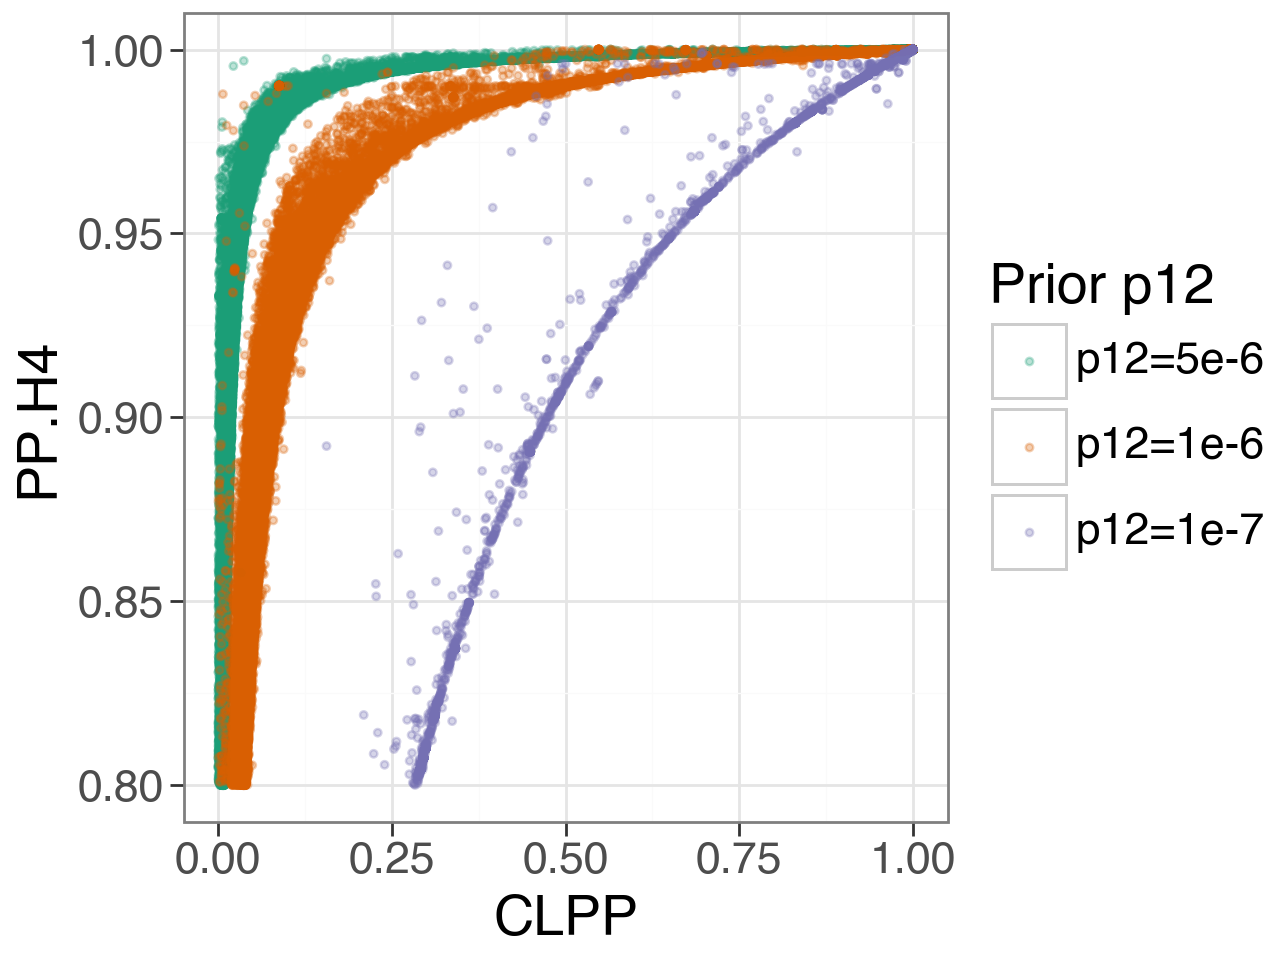

In [ ]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_point, labs,
    theme_bw, scale_color_brewer
)
#To get the full version you need to run gpu-coloc yourself
p5e6 = pd.read_csv("../data/finngen_lbf_results_0.8_5e-6.tsv", sep="\t")
p1e6 = pd.read_csv("../data/finngen_lbf_results_0.8_1e-6.tsv", sep="\t")
p1e7 = pd.read_csv("../data/finngen_lbf_results_0.8_1e-7.tsv", sep="\t")
clpp = pd.read_csv("../data/finngen_clpp_results.tsv", sep="\t")

merged_p5e6 = p5e6.merge(clpp, left_on=['signal1', 'signal2'], right_on=['signal_a', 'signal_b'], how='inner')
merged_p1e6 = p1e6.merge(clpp, left_on=['signal1', 'signal2'], right_on=['signal_a', 'signal_b'], how='inner')
merged_p1e7 = p1e7.merge(clpp, left_on=['signal1', 'signal2'], right_on=['signal_a', 'signal_b'], how='inner')

merged_p5e6['Prior p12'] = 'p12=5e-6'
merged_p1e6['Prior p12'] = 'p12=1e-6'
merged_p1e7['Prior p12'] = 'p12=1e-7'

df = pd.concat([merged_p5e6, merged_p1e6, merged_p1e7])

df['Prior p12'] = pd.Categorical(
    df['Prior p12'],
    categories=['p12=5e-6', 'p12=1e-6', 'p12=1e-7']
)

plot = (
    ggplot(df, aes(x='clpp', y='PP.H4', color='Prior p12')) +
    geom_point(size=1, alpha=0.3) +
    labs(
        x='CLPP',
        y='PP.H4',
        color='Prior p12'
    ) +
    theme_bw(base_size=20) +
    scale_color_brewer(
        type='qual',
        palette='Dark2',
        breaks=['p12=5e-6', 'p12=1e-6', 'p12=1e-7']
    )
)

plot

In [3]:
p5e6

,PP.H3,PP.H4,signal1,lead1,signal2,lead2
0,0.096144,0.903778,HEIGHT_IRN_chr7:147434463-152470982_L5,chr7_150845623_G_A,QTD000436_ENST00000462826_L1,chr7_150846879_T_A
1,0.116574,0.870114,HEIGHT_IRN_chr7:147434463-152470982_L5,chr7_150845623_G_A,QTD000195_7:150800828:150801536:clu_47021_+_L2,chr7_150819934_C_G
2,0.116005,0.883976,HEIGHT_IRN_chr7:147434463-152470982_L5,chr7_150845623_G_A,QTD000252_ENSG00000002933.9_7_150800788_150800...,chr7_150840547_G_A
3,0.005415,0.991961,HEIGHT_IRN_chr7:147434463-152470982_L5,chr7_150845623_G_A,QTD000259_ENSG00000002933.grp_1.upstream.ENSG0...,chr7_150845623_G_A
4,0.025660,0.970461,I9_HYPTENSESS_chr7:147977451-152493088_L1,chr7_150993088_C_T,QTD000234_ENSG00000002933.grp_1.downstream.ENS...,chr7_150803641_A_G
...,...,...,...,...,...,...
176150,0.138571,0.861370,KELA_DIAB_INSUL_EXMORE_chr18:40963879-43963879_L1,chr18_42335329_A_G,QTD000076_ENSG00000267586.7_18_42335084_423353...,chr18_42336141_G_C
176151,0.167443,0.832480,BMI_IRN_chr18:41024671-46719836_L4,chr18_43134950_AAAG_A,QTD000161_ENSG00000287209_L2,chr18_43128736_A_AAAAT
176152,0.130684,0.869312,BMI_IRN_chr18:41024671-46719836_L4,chr18_43134950_AAAG_A,QTD000162_ENSG00000287209.1_18_43127809_431290...,chr18_43128736_A_AAAAT
176153,0.156773,0.843158,WEIGHT_IRN_chr18:41024671-44024671_L2,chr18_43129365_A_G,QTD000161_ENSG00000287209_L2,chr18_43128736_A_AAAAT


In [4]:
merged_p5e6

,PP.H3,PP.H4,signal1,lead1,signal2,lead2,signal_a,signal_b,clpp,n_variants,Prior p12
0,0.096144,0.903778,HEIGHT_IRN_chr7:147434463-152470982_L5,chr7_150845623_G_A,QTD000436_ENST00000462826_L1,chr7_150846879_T_A,HEIGHT_IRN_chr7:147434463-152470982_L5,QTD000436_ENST00000462826_L1,0.020224,3,p12=5e-6
1,0.004983,0.994729,HEIGHT_IRN_chr7:147434463-152470982_L4,chr7_148867046_G_A,QTD000246_ENSG00000106462_L1,chr7_148884323_G_GC,HEIGHT_IRN_chr7:147434463-152470982_L4,QTD000246_ENSG00000106462_L1,0.281095,3,p12=5e-6
2,0.004392,0.995566,HEIGHT_IRN_chr7:147434463-152470982_L4,chr7_148867046_G_A,QTD000021_ENSG00000106462_L1,chr7_148887402_A_G,HEIGHT_IRN_chr7:147434463-152470982_L4,QTD000021_ENSG00000106462_L1,0.311404,3,p12=5e-6
3,0.049374,0.949890,HEIGHT_IRN_chr7:147434463-152470982_L6,chr7_149266561_C_T,QTD000289_ENSG00000204946.grp_1.downstream.ENS...,chr7_149271223_C_T,HEIGHT_IRN_chr7:147434463-152470982_L6,QTD000289_ENSG00000204946.grp_1.downstream.ENS...,0.034972,15,p12=5e-6
4,0.048414,0.950871,HEIGHT_IRN_chr7:147434463-152470982_L6,chr7_149266561_C_T,QTD000422_ENSG00000204946.grp_2.downstream.ENS...,chr7_149271223_C_T,HEIGHT_IRN_chr7:147434463-152470982_L6,QTD000422_ENSG00000204946.grp_2.downstream.ENS...,0.034584,10,p12=5e-6
...,...,...,...,...,...,...,...,...,...,...,...
139749,0.138571,0.861370,KELA_DIAB_INSUL_EXMORE_chr18:40963879-43963879_L1,chr18_42335329_A_G,QTD000076_ENSG00000267586.7_18_42335084_423353...,chr18_42336141_G_C,KELA_DIAB_INSUL_EXMORE_chr18:40963879-43963879_L1,QTD000076_ENSG00000267586.7_18_42335084_423353...,0.011877,32,p12=5e-6
139750,0.167443,0.832480,BMI_IRN_chr18:41024671-46719836_L4,chr18_43134950_AAAG_A,QTD000161_ENSG00000287209_L2,chr18_43128736_A_AAAAT,BMI_IRN_chr18:41024671-46719836_L4,QTD000161_ENSG00000287209_L2,0.009343,79,p12=5e-6
139751,0.130684,0.869312,BMI_IRN_chr18:41024671-46719836_L4,chr18_43134950_AAAG_A,QTD000162_ENSG00000287209.1_18_43127809_431290...,chr18_43128736_A_AAAAT,BMI_IRN_chr18:41024671-46719836_L4,QTD000162_ENSG00000287209.1_18_43127809_431290...,0.013069,67,p12=5e-6
139752,0.156773,0.843158,WEIGHT_IRN_chr18:41024671-44024671_L2,chr18_43129365_A_G,QTD000161_ENSG00000287209_L2,chr18_43128736_A_AAAAT,WEIGHT_IRN_chr18:41024671-44024671_L2,QTD000161_ENSG00000287209_L2,0.009932,73,p12=5e-6
